In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.2 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


In [10]:
from duckduckgo_search import ddg_images
from fastcore.all import *

from fastdownload import download_url

from fastai.vision.all import *






import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


def search_images(term,max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term,max_results=max_images)).itemgot('image')

search_terms_bear=['grizzly bear', 'grizzly bear cub', 'grizzly bear in the wild']

search_terms_cat=['persian cat','siamese cat', 'maine coon cat', 'bengal cat']


from time import sleep


#dest_folder_cats='/Users/mtejeda/Desktop/cats'
#dest_folder_bears='/Users/mtejeda/Desktop/bears'


In [18]:
path = Path("/kaggle/working/images/")

def process_images(path,label,o):
    dest=(path/label)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls= search_images(o))
    
results_bear= list(map(lambda x: process_images(path,"bear",x), search_terms_bear))
results_cat= list(map(lambda x: process_images(path,"cat",x), search_terms_cat))


failed_cats = verify_images(get_image_files(dest_folder_cats))
failed_cats.map(Path.unlink)

failed= verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


Searching for 'grizzly bear'
Searching for 'grizzly bear cub'
Searching for 'grizzly bear in the wild'
Searching for 'persian cat'
Searching for 'siamese cat'
Searching for 'maine coon cat'
Searching for 'bengal cat'


8

In [19]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)


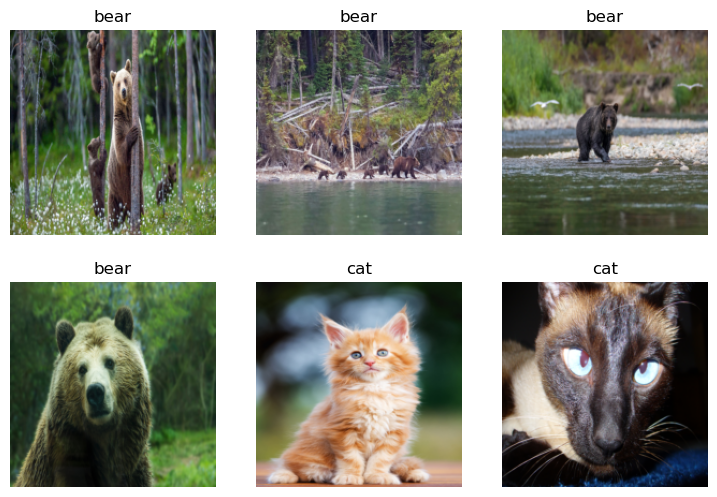

In [21]:
dls.show_batch(max_n=6)

In [22]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.530232,0.000238,0.000000,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.035102,0.000867,0.000000,00:45
1,0.020713,0.000873,0.000000,00:45
2,0.014801,0.001344,0.000000,00:45


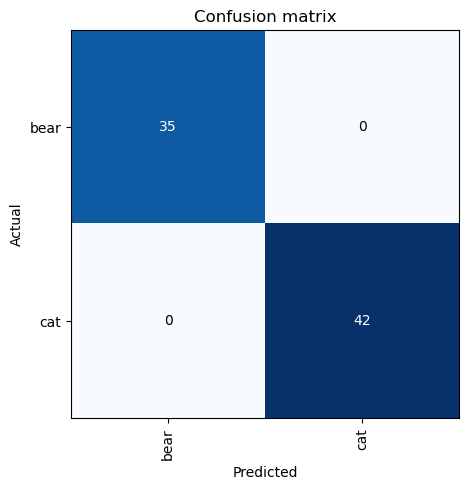

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

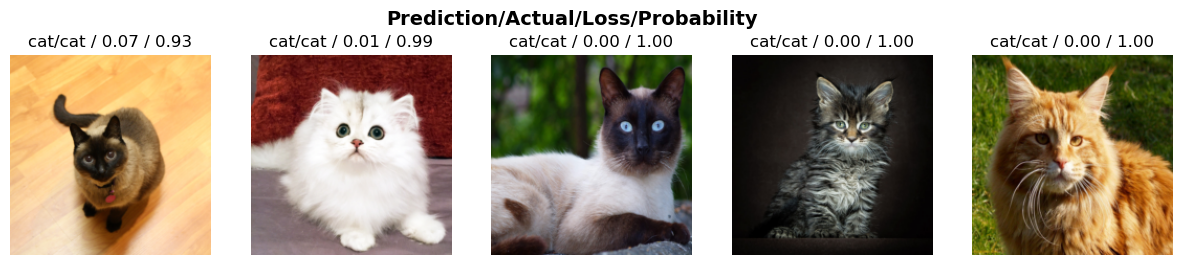

In [24]:
interp.plot_top_losses(5, nrows=1)

In [25]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
import ipywidgets as widgets
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

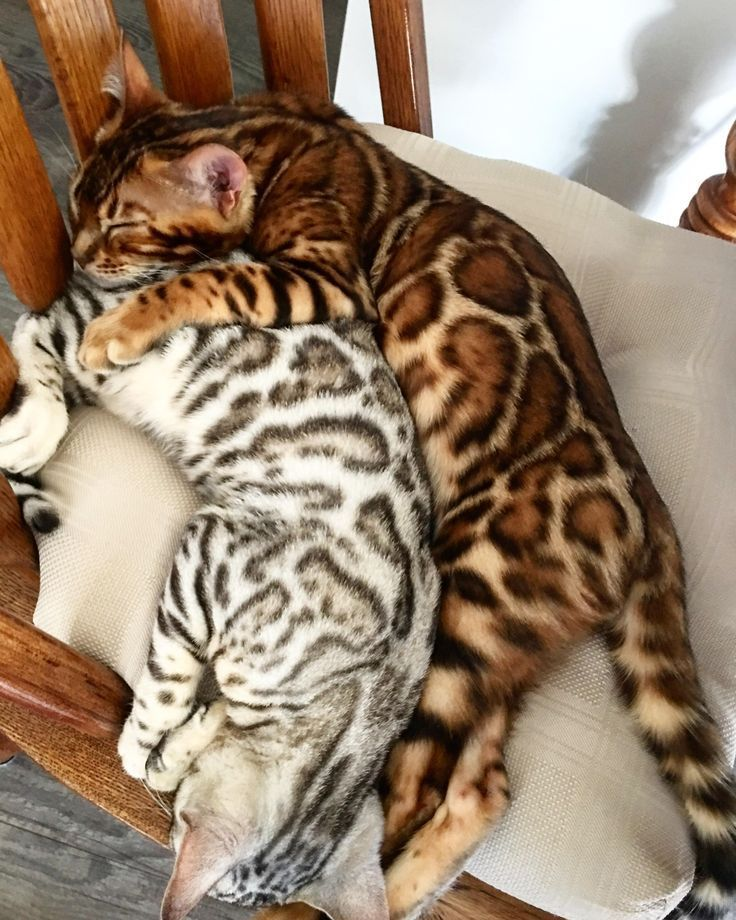

In [30]:
img = PILImage.create(btn_upload.data[-1])
img

In [31]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [42]:
from fastai.vision.all import *
path = Path("/kaggle/working/images")

learn_inf = load_learner('/kaggle/working/export.pkl')
learn_inf
# Load your trained model and classes
#learn_inf = load_learner(path)
pred,pred_idx,probs = learn_inf.predict(img)

In [43]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cat; Probability: 0.9999')

In [44]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [46]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [47]:
btn_upload = widgets.FileUpload()

In [51]:
import ipywidgets as widgets
from IPython.display import display

widgets.VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [52]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.1 MB/s eta 0:00:0000:0100:01
Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.5.0 OK
